<a href="https://colab.research.google.com/github/rajeevfromkrec/NLP/blob/master/Topic_modeling_fast_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
np.set_printoptions(suppress=True)

In [4]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [5]:
type(newsgroups_train)

sklearn.utils.Bunch

In [9]:
newsgroups_train.filenames[:1]

array(['/root/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38816'],
      dtype='<U86')

In [10]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

In [11]:
newsgroups_train.data[:2]

["Hi,\n\nI've noticed that if you only save a model (with all your mapping planes\npositioned carefully) to a .3DS file that when you reload it after restarting\n3DS, they are given a default position and orientation.  But if you save\nto a .PRJ file their positions/orientation are preserved.  Does anyone\nknow why this information is not stored in the .3DS file?  Nothing is\nexplicitly said in the manual about saving texture rules in the .PRJ file. \nI'd like to be able to read the texture rule information, does anyone have \nthe format for the .PRJ file?\n\nIs the .CEL file format available from somewhere?\n\nRych",
 '\n\nSeems to be, barring evidence to the contrary, that Koresh was simply\nanother deranged fanatic who thought it neccessary to take a whole bunch of\nfolks with him, children and all, to satisfy his delusional mania. Jim\nJones, circa 1993.\n\n\nNope - fruitcakes like Koresh have been demonstrating such evil corruption\nfor centuries.']

In [12]:
np.array(newsgroups_train.target_names)[:2]

array(['alt.atheism', 'comp.graphics'], dtype='<U18')

In [13]:
newsgroups_train.target[:10]

array([1, 3, 2, 0, 2, 0, 2, 1, 2, 1])

In [15]:
from sklearn.feature_extraction import stop_words

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [21]:
sorted(list(stop_words.ENGLISH_STOP_WORDS))[:20]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

In [23]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [24]:
from nltk import stem

In [29]:
wnl=stem.WordNetLemmatizer()
porter=stem.porter.PorterStemmer()

In [26]:
word_list = ['feet', 'foot', 'foots', 'footing']


In [27]:
[wnl.lemmatize(word) for word in word_list]

['foot', 'foot', 'foot', 'footing']

In [30]:
[porter.stem(word) for word in word_list]

['feet', 'foot', 'foot', 'foot']

In [37]:
!pip install -U spacy

     |████████████████████████████████| 10.0MB 3.3MB/s 
     |████████████████████████████████| 2.1MB 43.6MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4



✘ Unknown command: -m
Available: download, link, info, train, pretrain, debug-data, evaluate, convert,
package, init-model, profile, validate



In [40]:
import spacy

In [41]:
from spacy.lemmatizer import Lemmatizer


In [44]:
from spacy.lemmatizer import Lemmatizer
lemmatizer = Lemmatizer()

TypeError: ignored

In [46]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [47]:
vectorizer= CountVectorizer(stop_words='english')

In [48]:
vectors=vectorizer.fit_transform(newsgroups_train.data).todense()

In [49]:
vectors.shape

(2034, 26576)

In [51]:
vectors[0]

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [52]:
vocab= np.array(vectorizer.get_feature_names())

In [53]:
vocab.shape

(26576,)

In [54]:
%time u,s,vh= linalg.svd(vectors,full_matrices=False)

CPU times: user 1min 22s, sys: 4.18 s, total: 1min 26s
Wall time: 45.3 s


In [55]:
s[:4]

array([433.92698542, 291.51012741, 240.71137677, 220.00048043])

In [56]:
np.diag(s[:4])

array([[433.92698542,   0.        ,   0.        ,   0.        ],
       [  0.        , 291.51012741,   0.        ,   0.        ],
       [  0.        ,   0.        , 240.71137677,   0.        ],
       [  0.        ,   0.        ,   0.        , 220.00048043]])

In [57]:
recon_vect=u@s@vh

In [58]:
type(recon_vect)

numpy.ndarray

In [59]:
np.all(vectors==recon_vect)

False

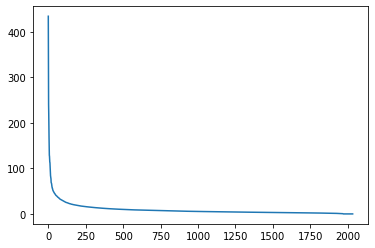

In [60]:
plt.plot(s)

In [64]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [65]:
show_topics(vh[:10])

['ditto critus propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material']

In [66]:
m,n=vectors.shape
d=5

In [67]:
clf=decomposition.NMF(n_components=d,random_state=1)

In [68]:
W1 = clf.fit_transform(vectors)
H1 = clf.components_

In [69]:
show_topics(H1)

['jpeg image gif file color images format quality',
 'edu graphics pub mail 128 ray ftp send',
 'space launch satellite nasa commercial satellites year market',
 'jesus god people matthew atheists does atheism said',
 'image data available software processing ftp edu analysis']